Economic Analysis of Singapore with the World Happiness Report
======

## Importing Data and Cleaning the dataset

In [4]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

data = pd.read_excel('data.xls', sheet_name = 'Table2.1')

clean_data = data.copy()

# Rename "#" to "ID" of Pokemon
clean_data.rename(columns = {'Country name': 'Country'}, inplace = True)

# Convert all Variable Names to UPPERCASE
clean_data.columns = clean_data.columns.str.upper()

# Remove all spaces and dots from Variable Names
clean_data.columns = clean_data.columns.str.replace(".","")
clean_data.columns = clean_data.columns.str.replace(" ","_")

# Print the Variable Information to check
# clean_data.info()

clean_data.sample(n = 10)

clean_data = clean_data.set_index('COUNTRY')

clean_data = clean_data.loc[["Singapore"]]

sg_data = clean_data[['YEAR', 'DEMOCRATIC_QUALITY', 'PERCEPTIONS_OF_CORRUPTION', 'LIFE_LADDER']]

sg_data.isnull().sum()

sg_data = sg_data[pd.notnull(sg_data['PERCEPTIONS_OF_CORRUPTION'])]

sg_data = sg_data[pd.notnull(sg_data['DEMOCRATIC_QUALITY'])]

sg_data.head()

,YEAR,DEMOCRATIC_QUALITY,PERCEPTIONS_OF_CORRUPTION,LIFE_LADDER
COUNTRY,,,,
Singapore,2007,0.405456,0.063615,6.833755
Singapore,2008,0.505373,0.065775,6.641957
Singapore,2009,0.472613,0.035198,6.144677
Singapore,2010,0.480224,0.060282,6.531402
Singapore,2011,0.544697,0.098924,6.561042


# Analysing Corruption

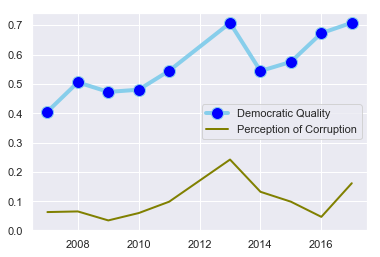

In [5]:
# multiple line plot
plt.plot( 'YEAR', 'DEMOCRATIC_QUALITY', data=sg_data, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Democratic Quality")
plt.plot( 'YEAR', 'PERCEPTIONS_OF_CORRUPTION', data=sg_data, marker='', color='olive', linewidth=2, label="Perception of Corruption")
plt.legend()

### Corruption in Singapore is generally perceived as low. However, a few minor scandals led to an sharp dip in Democratic Quality of the Country.

**SCDF and CNB (2012)** - In January 2012, two senior civil servants were arrested under graft charges. Both men were arrested in connection with the Prevention of Corruption Act relating to an IT contract

**NParks (2012)** - In July 2012, National Parks Board's (NParks) purchase of 26 Brompton bikes costing $2,200 each sparked a nationwide uproar after it was revealed by a whistleblower on online forum HardwareZone of possible corruption due numerous red flags in the way the procurement was done.

**CPIB (2013)** - On 23 July 2013, Corrupt Practices Investigation Bureau (CPIB) assistant director Edwin Yeo Seow Hionh was charged with misappropriating at least $1.7 million from the anti-graft agency between 2008 and 2012.

**MFA (2014)** -  On 20 February 2014, former Ministry of Foreign Affairs (MFA) protocol chief Lim Cheng Hoe, 61, was sentenced to 15 months' jail for cheating.

# Life Satisfaction over the years

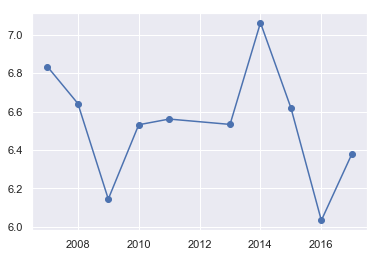

In [7]:
plt.plot('YEAR', 'LIFE_LADDER', data=sg_data, linestyle='-', marker='o')
plt.show()

In [62]:
data = pd.read_excel('data.xls', sheet_name = 'Table2.1')

clean_data = data.copy()

# Rename "#" to "ID" of Pokemon
clean_data.rename(columns = {'Country name': 'Country'}, inplace = True)

# Convert all Variable Names to UPPERCASE
clean_data.columns = clean_data.columns.str.upper()

# Remove all spaces and dots from Variable Names
clean_data.columns = clean_data.columns.str.replace(".","")
clean_data.columns = clean_data.columns.str.replace(" ","_")

# Print the Variable Information to check
# clean_data.info()

clean_data.sample(n = 10)

clean_data = clean_data.set_index('COUNTRY')

clean_data = clean_data.loc[["Germany", "United Kingdom", "France", "Italy", "Spain", "Netherlands", "Switzerland", "Sweden"]]

europe_data = clean_data[['YEAR', 'HEALTHY_LIFE_EXPECTANCY_AT_BIRTH']]

europe_data.isnull().sum()

year = pd.DataFrame(europe_data['YEAR'])

lifeExp = pd.DataFrame(europe_data['HEALTHY_LIFE_EXPECTANCY_AT_BIRTH'])

linear regression train score: 0.3619883649141594
linear regression test score: 0.4750260174714348

ridge regression train score low alpha: 0.3619883648825464
ridge regression test score low alpha: 0.4750241300886653

ridge regression train score high alpha: 0.35934436234748035
ridge regression test score high alpha: 0.45520997553704046


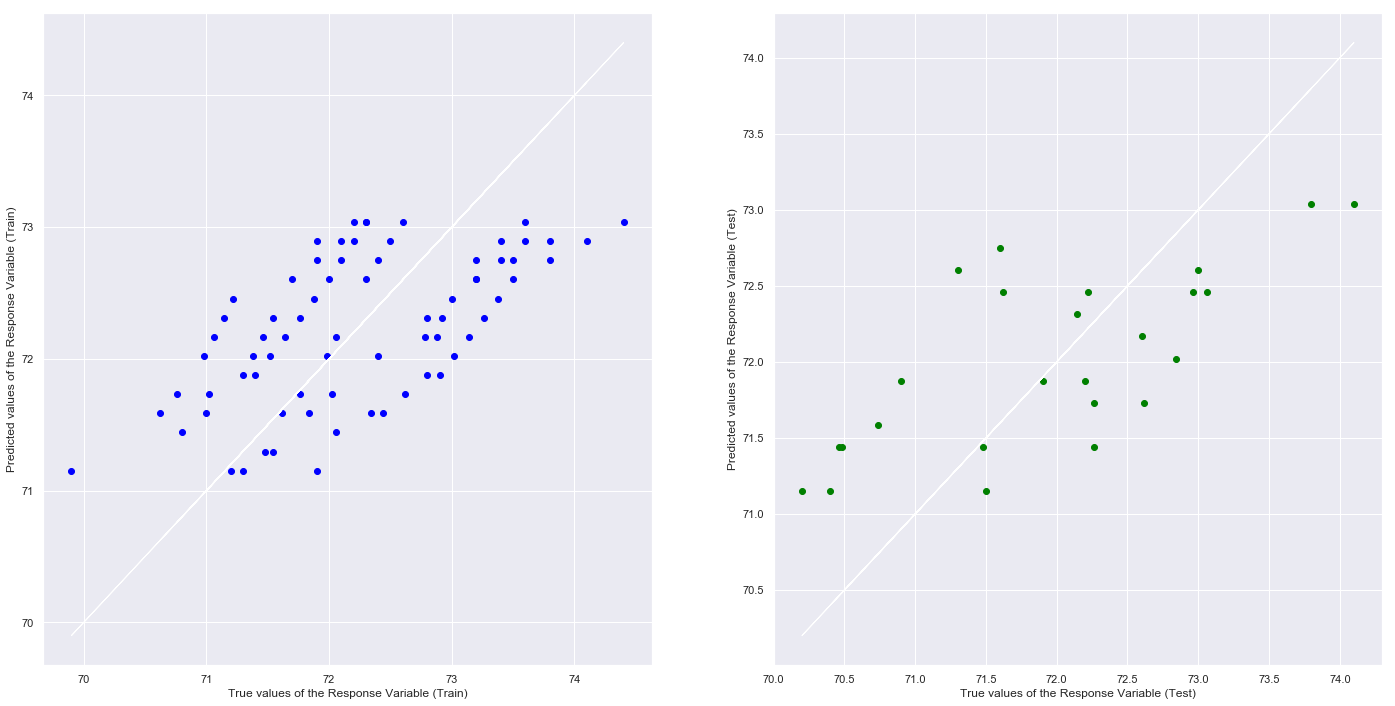

In [63]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

# Extract Response and Predictors
y = lifeExp
X = year

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model
# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

y_rr_train_pred = rr.predict(X_train)
y_rr_test_pred = rr.predict(X_test)

rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

train_score=linreg.score(X_train, y_train)
test_score=linreg.score(X_test, y_test)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print()
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print()
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

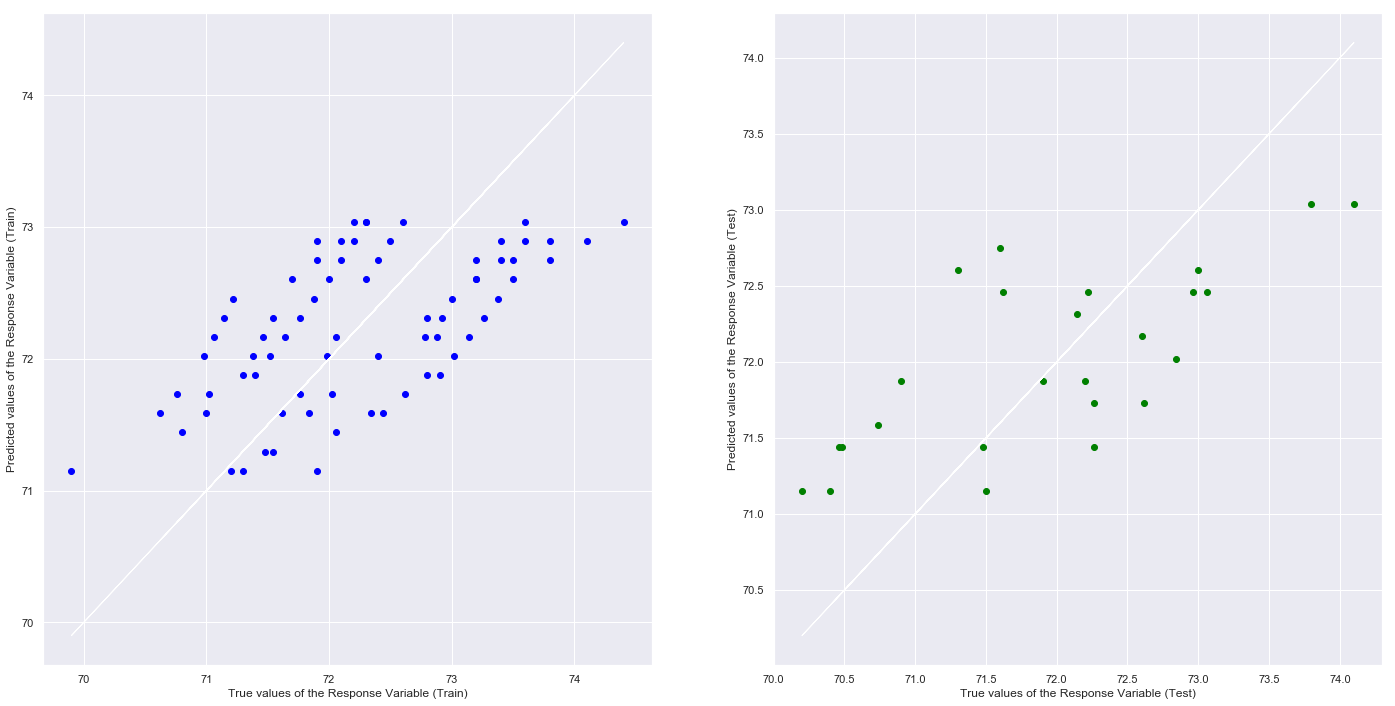

In [64]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

axes[1].scatter(y_test, y_rr_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
# conda update scikit-learn
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
data = pd.read_excel('data.xls', sheet_name = 'Table2.1')

clean_data = data.copy()

# Rename "#" to "ID" of Pokemon
clean_data.rename(columns = {'Country name': 'Country'}, inplace = True)

# Convert all Variable Names to UPPERCASE
clean_data.columns = clean_data.columns.str.upper()

# Remove all spaces and dots from Variable Names
clean_data.columns = clean_data.columns.str.replace(".","")
clean_data.columns = clean_data.columns.str.replace(" ","_")

# Print the Variable Information to check
# clean_data.info()

clean_data.sample(n = 10)

clean_data = clean_data.set_index('COUNTRY')

clean_data = clean_data.loc[["Luxembourg", "Ireland", "Norway", "Switzerland", "Netherlands", "Iceland", "Germany", "Denmark", "Sweden", "Austria"]]

europe_data = clean_data[['YEAR', 'HEALTHY_LIFE_EXPECTANCY_AT_BIRTH']]

europe_data.isnull().sum()

year = pd.DataFrame(europe_data['YEAR'])

lifeExp = pd.DataFrame(europe_data['HEALTHY_LIFE_EXPECTANCY_AT_BIRTH'])



#sg_data = sg_data[pd.notnull(sg_data['PERCEPTIONS_OF_CORRUPTION'])]

#sg_data = sg_data[pd.notnull(sg_data['DEMOCRATIC_QUALITY'])]

europe_x=data.iloc[:,1:2]
europe_y=data.iloc[:,0]


print(europe_x)
print(europe_y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(europe_x, europe_y, test_size=0.2, random_state=4)

In [ ]:
nn=MLPClassifier(hidden_layer_sizes=(300,15),random_state=1)

In [ ]:
nn.fit(x_train,y_train)

In [ ]:
pred=nn.predict(x_test)
#activation logistic with hidden layer sizes-> 45,90 Gave 92 % accuracy
#activation relu with hidden layer sizes-> 45,90 gave 89 % accuracy 
#Test with different combinatations of learning rate, activation and other hyper parameters and mesure the accuracy

In [ ]:
a=y_test.values

In [ ]:
a
count=0

for i in range(len(pred)):
    if pred[i]==a[i]:
        count=count+1

In [ ]:
count

In [ ]:
len(pred)